In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from common import Images, Fonts, Colors, add_twitter_handle
from matplotlib.patches import Rectangle, Ellipse, Arc
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [140]:
file = "4-23-RGN-goal1"
title = "OL Reign v Chicago Red Stars (4/23/2023)"
subtitle = "Bethany Balcer opens up scoring off a Latsko cross, with help from a Huitema fake."

In [159]:
file = "4-23-RGN-goal5"
title = "OL Reign v Chicago Red Stars (4/23/2023)"
subtitle = "Jess Fishlock scored OL Reign's final goal of the match for a final score of 5-2."

In [160]:
df = pd.read_csv("data/" + file + ".csv")

# Normalize coordinates to a 100x70 field
df["y"] = df["y"] * 70 / 100
df["y2"] = df["y2"] * 70 / 100

df

,minute,second,type,x,y,x2,y2,name,number,team
0,75,23,1,2.2,30.94,15.0,5.39,P. Tullis-Joyce,91,RGN
1,75,26,1,15.1,5.39,27.5,17.78,S. Huerta,11,RGN
2,75,29,1,27.6,17.71,27.9,9.31,E. Sonnett,2,RGN
3,75,39,1,68.6,20.51,87.8,14.00,S. Huerta,11,RGN
4,75,40,1,87.8,14.00,87.1,36.47,B. Balcer,8,RGN
5,75,42,16,87.1,36.47,99.0,35.70,J. Fishlock,10,RGN


In [161]:
field = Colors.WHITE
lines = Colors.BLACK

def move_point_towards(x, y, x2, y2, r):
    """Moves x,y towards x2, y2 with a distance of r."""
    d = math.sqrt((x - x2) ** 2 + (y - y2) ** 2)
    theta = math.atan(-(y2 - y) / (x2 - x + 0.0001))
    x_sign = 1 if x < x2 else -1
    y_sign = 1 if (y < y2 and x > x2) or (y > y2 and x > x2) else -1
    
    return (x + x_sign * math.cos(theta) * r, y + y_sign * math.sin(theta) * r)


def player_mark(ax, x, y, label):
    ax.plot(
        x,
        y,
        marker="o",
        markerfacecolor=field,
        markeredgecolor=lines,
        markersize=20,
        markeredgewidth=3,
    )
    ax.text(
        x,
        y,
        label,
        ha="center",
        va="center",
        color=lines,
        fontsize=14,
    )
    
def arrow_path(ax, start, end, style):
    ax.add_patch(
        patches.FancyArrowPatch(
            start,
            end,
            arrowstyle="-",
            mutation_scale=40,
            linewidth=3,
            linestyle=style,
            color=lines,
        )
    )
    ax.add_patch(
        patches.FancyArrowPatch(
            move_point_towards(end[0], end[1], start[0], start[1], 0.5),
            move_point_towards(end[0], end[1], start[0], start[1], -1.25),
            arrowstyle="->",
            mutation_scale=40,
            linewidth=3,
            linestyle="-",
            color=lines,
        )
    )

<Figure size 2800x1800 with 0 Axes>

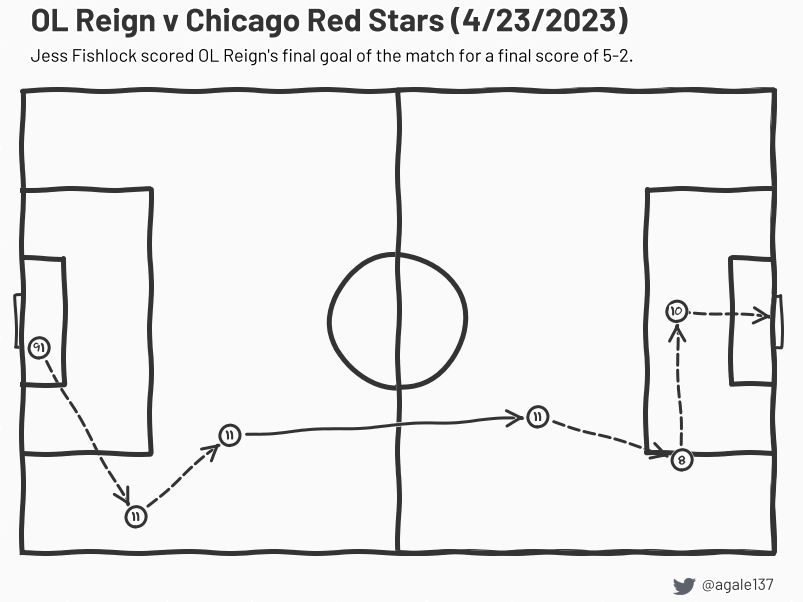

In [162]:
# Setup
plt.rcParams["figure.figsize"] = (14, 9)
plt.figure(dpi=200)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)
plt.xkcd()

# Build the field
# Goal
ax.plot([100, 100 + 1, 100 + 1, 100], [31, 31, 31 + 8, 31 + 8], color=lines, lw=3)
ax.plot([0, 0 - 1, 0 - 1, 0], [31, 31, 31 + 8, 31 + 8], color=lines, lw=3)
# Touchline
ax.plot([0, 100, 100, 0, 0], [0, 0, 70, 70, 0], color=lines, lw=5)
# Center circle
ax.add_patch(Ellipse((50, 35), 18, 20, ec=lines, fill=False, lw=5))
# Center line
ax.add_patch(Rectangle((50, 0), 50, 70, ec=lines, fill=False, lw=5))
# 18-yard box
ax.plot([100, 100 - 17, 100 - 17, 100], [15, 15, 15 + 40, 15 + 40], color=lines, lw=5)
ax.plot([0, 17, 17, 0], [15, 15, 15 + 40, 15 + 40], color=lines, lw=5)
# 6-yard box
ax.plot(
    [100, 100 - 5.6, 100 - 5.6, 100],
    [25.5, 25.5, 25.5 + 19, 25.5 + 19],
    color=lines,
    lw=5,
)
ax.plot([0, 5.6, 5.6, 0], [25.5, 25.5, 25.5 + 19, 25.5 + 19], color=lines, lw=5)

x_prev = None
y_prev = None
x2_prev = None
y2_prev = None
for i, row in df.iterrows():
    player_mark(ax, row["x"], row["y"], row["number"])

    # When there is a longer distance between the previous pass and the next,
    # this means the player was dribbling
    if x_prev and y_prev:
        # Shift line start and end to account for player marks
        start = move_point_towards(x_prev, y_prev, row["x"], row["y"], 2)
        end = move_point_towards(row["x"], row["y"], x_prev, y_prev, 2.5)
        arrow_path(ax, start, end, "--")

        if math.sqrt((x2_prev - row["x"]) ** 2 + (y2_prev - row["y"]) ** 2) > 5:
            player_mark(ax, x_prev, y_prev, row["number"])
            arrow_path(
                ax,
                move_point_towards(x_prev, y_prev, row["x"], row["y"], 2),
                move_point_towards(row["x"], row["y"], x_prev, y_prev, 2.5),
                "-",
            )

    x_prev = row["x"]
    y_prev = row["y"]
    x2_prev = row["x2"]
    y2_prev = row["y2"]

# Goal
arrow_path(ax, (x_prev, y_prev), (x2_prev, y2_prev), "--")

# Axes
plt.ylim([-2, 72])
plt.xlim([-2, 102])
ax.axis("off")

# Title
plt.title(
    title,
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    x=0.03,
    y=1.08,
    ha="left",
    color=Colors.BLACK,
)

# Subtitle
ax.text(
    0.03,
    1.03,
    subtitle,
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=ax.transAxes,
)

add_twitter_handle(fig, x=0.78, y=0.08, fs=16, w=0.028)

# Save image
plt.savefig("images/" + file + ".png", bbox_inches="tight", pad_inches=0.5, dpi=200)